In [3]:
#General imports.

%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt
import matplotlib 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20)
def setint():
    mpld3.enable_notebook()
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)
def noint():
    mpld3.disable_notebook()
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)


import ROOT as r
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import csv
import pandas

#import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import numpy as np
import os
import scipy

import uproot # https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf
from awkward import JaggedArray
from root_pandas import read_root # https://github.com/scikit-hep/root_pandas

import warnings
warnings.filterwarnings('once')

plt.rcParams['figure.facecolor'] = 'white'

noint()

Welcome to JupyROOT 6.12/06


----

### Because the 9d is being deleted as we speak, lets try this for the 60h first

In [4]:
import csv
import time
import calendar

startTimeVec = []
timeFormat = "%Y-%m-%d %H:%M:%S"

with open('query_60h.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='|')
    line_count = 0
    for row in csv_reader:
        try:
            startTimeVec.append((int(row[0]), 
                                 time.strptime(row[3], timeFormat), 
                                 time.strptime(row[5],timeFormat),
                                calendar.timegm(time.strptime(row[3], timeFormat)),
                                calendar.timegm(time.strptime(row[5], timeFormat))))
        except:
            print("ERROR: ", row)
        
        line_count += 1
            

In [5]:
row

['15991',
 '2018-04-25 02:00:58.119998',
 'quad at 13.1, 18.3kV; kicker at 3.60,2.64,2.76; external',
 '2018-04-25 02:00:40',
 '1.30674382197369e+15',
 '2018-04-25 01:40:20',
 '0.887959820264264',
 'Albahri and Valetov',
 '/data1/gm2',
 '25377',
 '305538822076',
 '1185480',
 'Y']

In [6]:
startTimeVec[1]

(15922,
 time.struct_time(tm_year=2018, tm_mon=4, tm_mday=22, tm_hour=15, tm_min=12, tm_sec=45, tm_wday=6, tm_yday=112, tm_isdst=-1),
 time.struct_time(tm_year=2018, tm_mon=4, tm_mday=22, tm_hour=14, tm_min=8, tm_sec=44, tm_wday=6, tm_yday=112, tm_isdst=-1),
 1524409965,
 1524406124)

In [7]:
ding = startTimeVec[1][2]

In [8]:
print(ding)

time.struct_time(tm_year=2018, tm_mon=4, tm_mday=22, tm_hour=14, tm_min=8, tm_sec=44, tm_wday=6, tm_yday=112, tm_isdst=-1)


In [9]:
calendar.timegm(ding)

1524406124

In [10]:
dfrun = pandas.DataFrame(startTimeVec, columns=['run','timeend_full','timestart_full','timeend','timestart'])

In [11]:
dfrun['deltat'] = dfrun['timeend'] - dfrun['timestart'] 

In [12]:
dfrun.head()

,run,timeend_full,timestart_full,timeend,timestart,deltat
0,15921,"(2018, 4, 22, 14, 3, 5, 6, 112, -1)","(2018, 4, 22, 13, 13, 52, 6, 112, -1)",1524405785,1524402832,2953
1,15922,"(2018, 4, 22, 15, 12, 45, 6, 112, -1)","(2018, 4, 22, 14, 8, 44, 6, 112, -1)",1524409965,1524406124,3841
2,15923,"(2018, 4, 22, 16, 16, 28, 6, 112, -1)","(2018, 4, 22, 15, 12, 55, 6, 112, -1)",1524413788,1524409975,3813
3,15924,"(2018, 4, 22, 17, 20, 19, 6, 112, -1)","(2018, 4, 22, 16, 16, 38, 6, 112, -1)",1524417619,1524413798,3821
4,15925,"(2018, 4, 22, 18, 24, 53, 6, 112, -1)","(2018, 4, 22, 17, 20, 42, 6, 112, -1)",1524421493,1524417642,3851


In [13]:
dfrun.describe()

,run,timeend,timestart,deltat
count,64.000000,6.400000e+01,6.400000e+01,64.000000
mean,15953.843750,1.524517e+09,1.524514e+09,3279.359375
std,20.432792,6.222711e+04,6.247723e+04,1136.770507
min,15921.000000,1.524406e+09,1.524403e+09,97.000000
25%,15936.750000,1.524468e+09,1.524464e+09,3370.000000
50%,15952.500000,1.524521e+09,1.524519e+09,3775.500000
75%,15970.500000,1.524567e+09,1.524566e+09,3826.500000
max,15991.000000,1.524622e+09,1.524620e+09,4473.000000


---

### and also getting the temperatures for that period of time along with their timestamps

In [14]:
filelist = ["./allcalo_60h_temps.csv"]
print(filelist)

['./allcalo_60h_temps.csv']


In [15]:
tempVec = []
timeFormatTemp = "%Y-%m-%d %H:%M:%S.%f" # 2018-05-12 09:51:38.169989 |

for file in filelist:
    #tempVeci = []

    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter='|')
        line_count = 0
        for row in csv_reader:
            try:
                caloNum = int((row[1].split("calo"))[1].split('temps')[0])
                ding = []
                for x in row[2][1:-1].split(','):
                    if float(x) > 0 and float(x) < 100:
                        ding.append(float(x))
                    else:
                        ding.append(float('nan'))
                #print(ding)
                tempVec.append((caloNum, ding, np.nanmean(ding), 
                                time.strptime(row[3], timeFormatTemp), 
                                calendar.timegm(time.strptime(row[3], timeFormatTemp)) ))
            except:
                print("ERROR: ", row)

                line_count += 1
                if(line_count > 50):
                    break
            
    #tempVec.append(tempVeci)

#print(tempVec)

ERROR:  ['40049820', 'calo23temps', '{0,36.25,35.9375,36.875,37.8125,38.75,39.4375,41.1875,39.5625,0,35.8125,36.1875,37.625,38.5,39.4375,40.8125,41.1875,39.5,0,0,37.3125,37.25,39.3125,0,41.5625,43,41.375,0,36.25,37.9375,0,40.3125,41.25,41.375,0,41.4375,0,34.9375,36,37.5625,39.125,39.625,41,42.8125,41.3125,0,35.8125,36.1875,37.8125,38.75,39.5,0,41.8125,40.0625}', '2018-04-23 01:26:32', 't']


In [16]:
df = pandas.DataFrame(tempVec, columns=['calo','temps','avgtemp','timefull','time'])

In [17]:
df.head()

,calo,temps,avgtemp,timefull,time
0,18,"[nan, 35.1875, 36.1875, 36.5625, 37.125, 37.37...",37.909722,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604
1,10,"[nan, 35.5, 36.3125, 36.6875, 37.5625, 38.4375...",38.774457,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604
2,3,"[nan, 35.5, 36.0625, 36.9375, 37.5625, 37.6875...",38.280556,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604
3,16,"[nan, 37.5, 37.3125, 37.375, 38.6875, 39.875, ...",39.565476,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604
4,24,"[nan, 36.0625, 36.25, 37.1875, 38.1875, 38.562...",39.205163,"(2018, 4, 25, 3, 40, 4, 2, 115, -1)",1524627604


In [18]:
df.describe()

,calo,avgtemp,time
count,180553.000000,180553.000000,1.805530e+05
mean,12.498674,38.705242,1.524515e+09
std,6.922205,0.840601,6.515642e+04
min,1.000000,36.015625,1.524402e+09
25%,6.000000,38.173611,1.524458e+09
50%,12.000000,38.729167,1.524514e+09
75%,18.000000,39.242424,1.524571e+09
max,24.000000,42.908854,1.524628e+09


In [19]:
df1 = df.loc[ df['calo'] == 1 ]

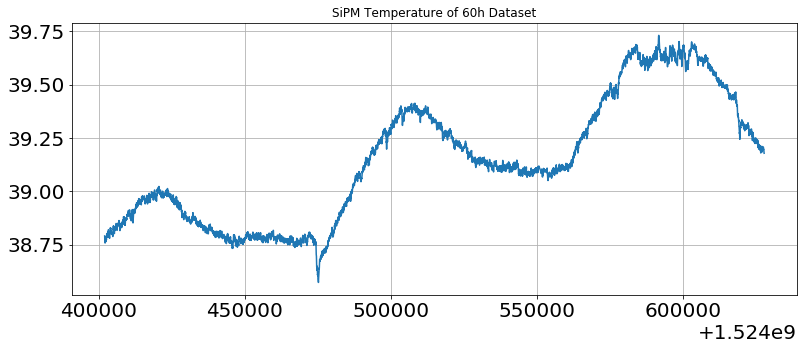

In [20]:
fig, ax = plt.subplots(figsize=(13,5))
plt.title("SiPM Temperature of 60h Dataset")
plt.plot(df1['time'], df1["avgtemp"])
runRecs = []
for i, row in dfrun.iterrows():
    ding = matplotlib.patches.Rectangle([row['timestart'], 42], row['timeend'] - row['timestart'], 2, color='red', alpha=0.5)
    runRecs.append(ding)
for rec in runRecs:
    ax.add_patch(rec)
    
plt.grid()

plt.show()

In [21]:
meanTemps = []
for i, row in dfrun.iterrows():
    dfi = (df.loc[df['time'] > row['timestart']]).loc[df['time'] < row['timeend']]
    
    meani = dfi['avgtemp'].mean()
    meanTemps.append((row['run'], meani ))


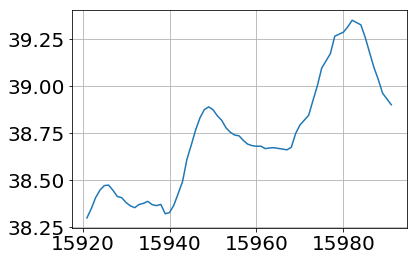

In [22]:
runs, temps = zip(*meanTemps)
plt.plot(runs,temps)
plt.grid()
plt.show()

good calos:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 23]


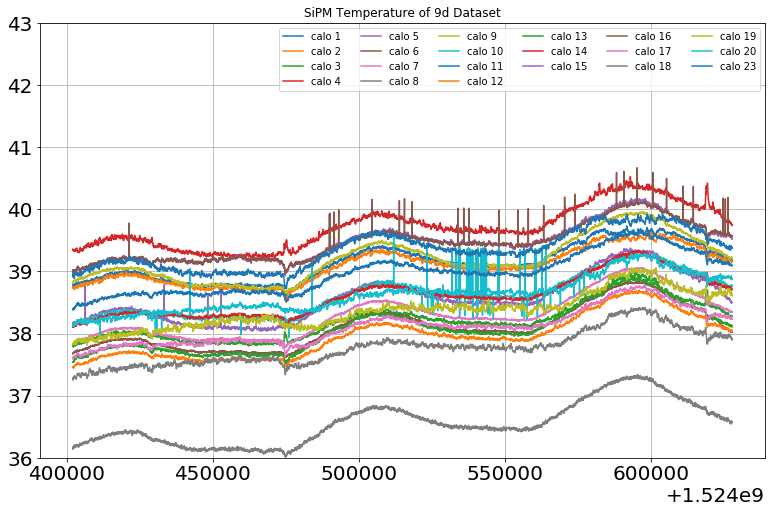

In [23]:
fig, ax = plt.subplots(figsize=(13,8))

#goodcalos = [i for i in range(1,16)]+[i for i in range(17,21)]+[i for i in range(23,24)]
goodcalos = [i for i in range(1,21)]+[i for i in range(23,24)]
print("good calos: ", goodcalos)

for calo in goodcalos:
    df1 = df.loc[ df['calo'] == calo ]
    plt.title("SiPM Temperature of 9d Dataset")
    plt.plot(df1['time'], df1["avgtemp"], label='calo '+str(calo))
runRecs = []
for i, row in dfrun.iterrows():
    ding = matplotlib.patches.Rectangle([row['timestart'], 42], row['timeend'] - row['timestart'], 2, color='red', alpha=0.5)
    runRecs.append(ding)
#for rec in runRecs:
#    ax.add_patch(rec)
    
plt.grid()
plt.ylim(36,43)

plt.legend(ncol=6)
plt.show()

In [24]:
avgtempvec = []
for calo in goodcalos:
    df1 = df.loc[ df['calo'] == calo ]
    ding = df1['avgtemp'].mean()
    avgtempvec.append(ding)

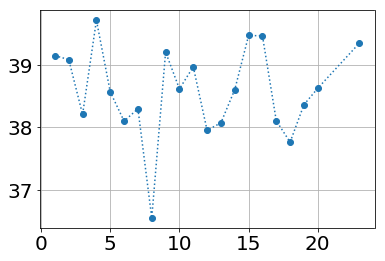

In [25]:
plt.plot(goodcalos,avgtempvec,":o")
plt.grid()
plt.show()

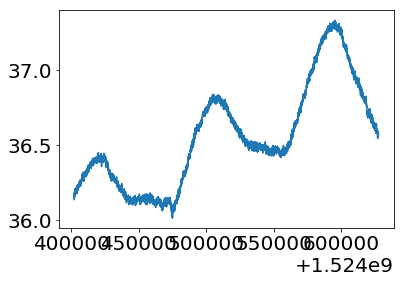

In [26]:
df1 = df.loc[ df['calo'] == 8 ]
plt.plot(df1['time'],df1['avgtemp'])

In [27]:
meanTemps = []
for calo in goodcalos:
    for i, row in dfrun.iterrows():
        dfi = (df.loc[df['time'] > row['timestart']]).loc[df['time'] < row['timeend']].loc[df['calo'] == calo]

        meani = dfi['avgtemp'].mean()
        meanTemps.append((calo, row['run'], meani ))

In [28]:
meanTemps[:10]

[(1, 15921, 38.807412131519285),
 (1, 15922, 38.85216408268732),
 (1, 15923, 38.90697725284337),
 (1, 15924, 38.959470691163574),
 (1, 15925, 38.98600344530579),
 (1, 15926, 38.9819767441861),
 (1, 15927, 38.935852999016724),
 (1, 15928, 38.87422839506173),
 (1, 15929, 38.846336395450564),
 (1, 15930, 38.81376357560565)]

In [29]:
dfavg = pandas.DataFrame(meanTemps, columns=['calo','run','avgtemp'])

In [35]:
dfavg.to_csv("./average_temps_by_run_by_calo.csv")

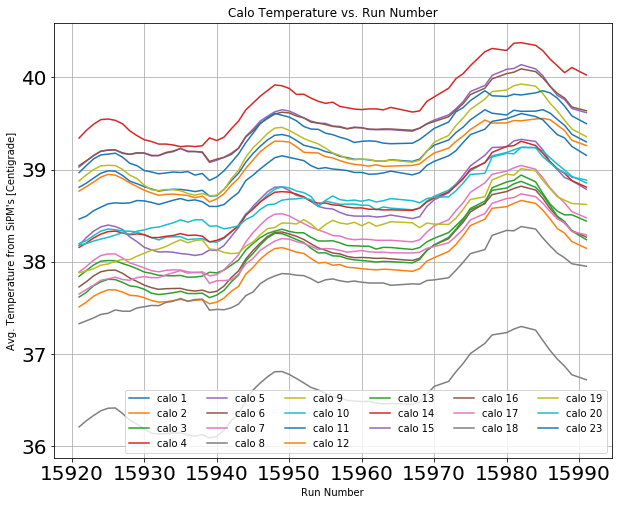

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
swingvec = []
plt.title("Calo Temperature vs. Run Number")
plt.xlabel("Run Number")
plt.ylabel("Avg. Temperature from SiPM's [Centigrade]")
for calo in goodcalos:
    dfi = dfavg.loc[dfavg['calo'] == calo].loc[dfavg['run'] < 16400]
    plt.plot(dfi['run'], dfi['avgtemp'], label='calo '+str(calo))
    swingvec.append( dfi['avgtemp'].max() - dfi['avgtemp'].min() )
plt.legend(ncol=6)
plt.grid()
plt.show()

In [31]:
dfi.head()

,calo,run,avgtemp
1280,23,15921,38.966555
1281,23,15922,39.043210
1282,23,15923,39.115650
1283,23,15924,39.158178
1284,23,15925,39.167512


In [32]:
c23runs = []
c23temp = []
dfi = dfavg.loc[dfavg['calo'] == 1].loc[dfavg['run'] < 16400]
for row in dfi.iterrows():
    c23runs.append(row[1]['run'])
    c23temp.append(row[1]['avgtemp'])

In [33]:
print(c23temp)

[38.807412131519285, 38.85216408268732, 38.90697725284337, 38.959470691163574, 38.98600344530579, 38.9819767441861, 38.935852999016724, 38.87422839506173, 38.846336395450564, 38.81376357560565, 38.78957194899818, 38.765893901420164, 38.7786405723905, 38.786122047244135, 38.784512937595125, 38.774861111111115, 38.761002604166634, 38.77541232638885, 38.71108990670062, 38.71688034188035, 38.78490823412699, 38.87856891701828, 38.95928184281844, 39.079289493575196, 39.173846153846114, 39.25206128747799, 39.320932539682545, 39.37151137357829, 39.38053333333331, 39.36202938475668, 39.31534391534392, 39.26375272331154, 39.244878472222204, 39.22555555555555, 39.195039682539644, 39.17638888888889, 39.14300044091713, 39.129354056437336, 39.11138451443567, 39.112434383202135, 39.10532015065913, 39.09321338383837, 39.089422222222176, 39.106196581196585, 39.088436692506434, 39.1133913764511, 39.20007309941517, 39.264709595959594, 39.3206459435626, 39.40079821200512, 39.46041092745635, 39.53913139329

In [34]:
print(c23runs)

[15921.0, 15922.0, 15923.0, 15924.0, 15925.0, 15926.0, 15927.0, 15928.0, 15929.0, 15930.0, 15931.0, 15932.0, 15933.0, 15934.0, 15935.0, 15936.0, 15937.0, 15938.0, 15939.0, 15940.0, 15941.0, 15942.0, 15943.0, 15944.0, 15945.0, 15946.0, 15947.0, 15948.0, 15949.0, 15950.0, 15951.0, 15952.0, 15953.0, 15954.0, 15955.0, 15956.0, 15957.0, 15958.0, 15959.0, 15960.0, 15961.0, 15962.0, 15963.0, 15964.0, 15967.0, 15968.0, 15969.0, 15970.0, 15972.0, 15973.0, 15974.0, 15975.0, 15977.0, 15978.0, 15980.0, 15981.0, 15982.0, 15984.0, 15985.0, 15986.0, 15987.0, 15988.0, 15989.0, 15991.0]


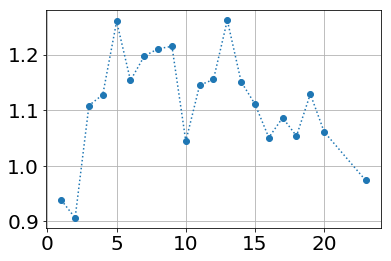

In [29]:
plt.plot(goodcalos,swingvec,'o:')
plt.grid()
plt.show()

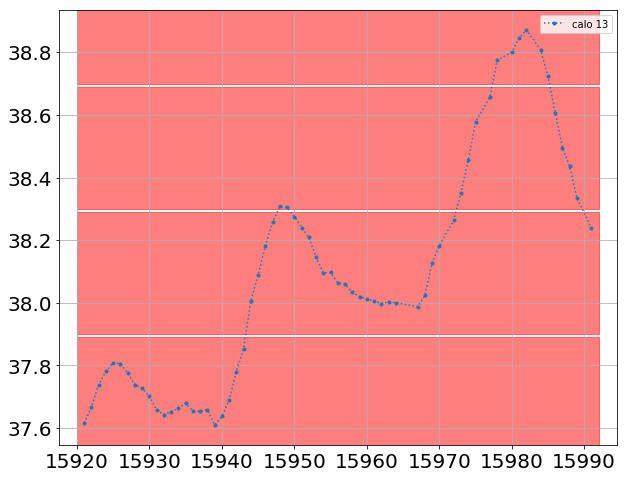

In [43]:
fig, ax = plt.subplots(figsize=(10,8))
for calo in range(13,14):
    dfi = dfavg.loc[dfavg['calo'] == calo]
    plt.plot(dfi['run'], dfi['avgtemp'], ':.', label='calo '+str(calo))
    
runsByTemp = []
runRecs = []
centerTemps = []
meanTemps =[]

tempwidth = 4
for i in range(375,388,tempwidth):
    centerTemps.append((i/10. + (i+tempwidth)/10.)/2.)
    dfi2 = dfavg.loc[dfavg['calo'] == calo].loc[dfavg['avgtemp'] > i/10.].loc[dfavg['avgtemp'] < (i+tempwidth)/10.]
    runsByTemp.append(dfi2['run'].tolist())
    meanTemps.append( dfi2['avgtemp'].mean() )
    edge = i/10.
    ding = matplotlib.patches.Rectangle([15920, edge], 72 , tempwidth/10. - 0.01, 
                                        color='red', alpha=0.5)
    runRecs.append(ding)
for rec in runRecs:
    ax.add_patch(rec)
    
plt.legend(ncol=6)
plt.grid()
plt.show()

Ok, so these temperature ranges seem good. Which runs are these?

In [44]:
print(runsByTemp)
print(centerTemps)
print(meanTemps)
for runsi in runsByTemp:
    print(len(runsi))

[[15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943], [15944, 15945, 15946, 15947, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15967, 15968, 15969, 15970, 15972, 15991], [15948, 15949, 15973, 15974, 15975, 15977, 15986, 15987, 15988, 15989], [15978, 15980, 15981, 15982, 15984, 15985]]
[37.7, 38.099999999999994, 38.5, 38.900000000000006]
[37.70427082731161, 38.10464593519258, 38.45265175025021, 38.80350822641892]
23
25
10
6


---

### And now lets actually take a look at this data

In [45]:
f = r.TFile("./results_wiggleByRun_60h_Feb7.root")
f.cd("farline/calo13")
#f.ls()

True

In [46]:
wiggleHist = f.Get("farline").Get("calo13").Get("wiggleByRun").Clone()

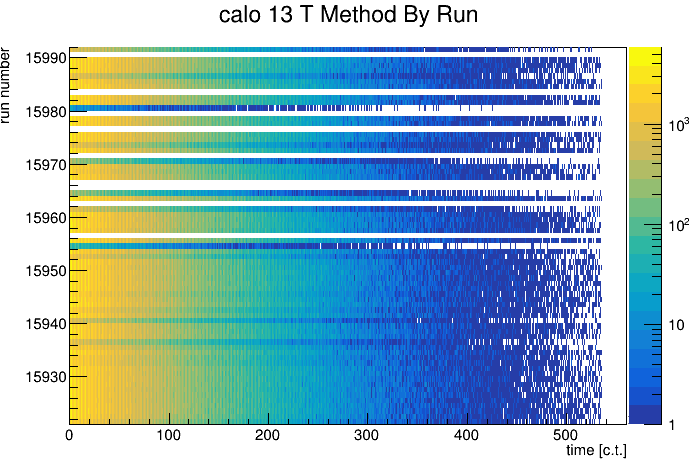

In [47]:
c = r.TCanvas()
wiggleHist.Draw("COLZ")
c.SetLogz()
c.Draw()

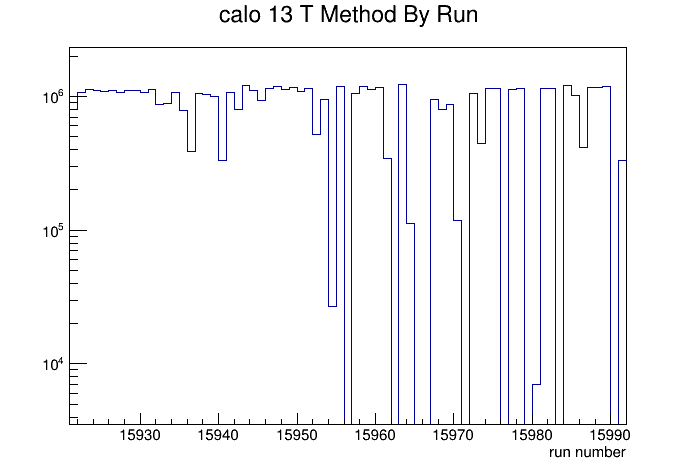

In [48]:
#wiggleHist.GetYaxis().SetRangeUser(15920,15930)
wiggleHist.ProjectionY().Draw()

c.SetLogy()
c.Draw()

In [49]:
# create a map of bin number to run number
print(wiggleHist.GetNbinsY())
runsInWiggle = []
for i in range(1,wiggleHist.GetNbinsY()+1):
    x =  wiggleHist.GetYaxis().GetBinCenter(i) - wiggleHist.GetYaxis().GetBinWidth(i)/2.
    runsInWiggle.append(int(x))
    #print(i, x , x-i )
    
def tobin(run):
    return int(run - (wiggleHist.GetYaxis().GetBinCenter(1) - wiggleHist.GetYaxis().GetBinWidth(1)/2.- 1) )

71


In [50]:
tobin(15951)

31

In [51]:
print(runsInWiggle)

[15921, 15922, 15923, 15924, 15925, 15926, 15927, 15928, 15929, 15930, 15931, 15932, 15933, 15934, 15935, 15936, 15937, 15938, 15939, 15940, 15941, 15942, 15943, 15944, 15945, 15946, 15947, 15948, 15949, 15950, 15951, 15952, 15953, 15954, 15955, 15956, 15957, 15958, 15959, 15960, 15961, 15962, 15963, 15964, 15965, 15966, 15967, 15968, 15969, 15970, 15971, 15972, 15973, 15974, 15975, 15976, 15977, 15978, 15979, 15980, 15981, 15982, 15983, 15984, 15985, 15986, 15987, 15988, 15989, 15990, 15991]


In [52]:
wiggleHist = f.Get("farline").Get("calo13").Get("wiggleByRun").Clone()
tempHists = []

for i, group in enumerate(runsByTemp):
    if(len(group)<1):
        continue
    h = wiggleHist.ProjectionX().Clone("htemp_"+str(i))
    h.Reset()
    h.SetTitle("Wiggle for Group "+str(i))
    for run in group:
        #print(run, tobin(run),tobin(run+1))
        h2 = wiggleHist.Clone()
        h2.GetYaxis().SetRangeUser(run, run+0.5)
        h3 = h2.ProjectionX("_px",tobin(run),tobin(run+1),"")
        h.Add(h3,1)
    tempHists.append(h.Clone("htemp_"+str(i)))

In [53]:
print(tempHists)
print([h.GetEntries() for h in tempHists])

[<ROOT.TH1D object ("htemp_0") at 0x7f8b39d11860>, <ROOT.TH1D object ("htemp_1") at 0x7f8b39d12f50>, <ROOT.TH1D object ("htemp_2") at 0x7fffe1690e60>, <ROOT.TH1D object ("htemp_3") at 0x7f8b31b92e80>]
[44802622.0, 36179909.0, 19274734.0, 9371417.0]


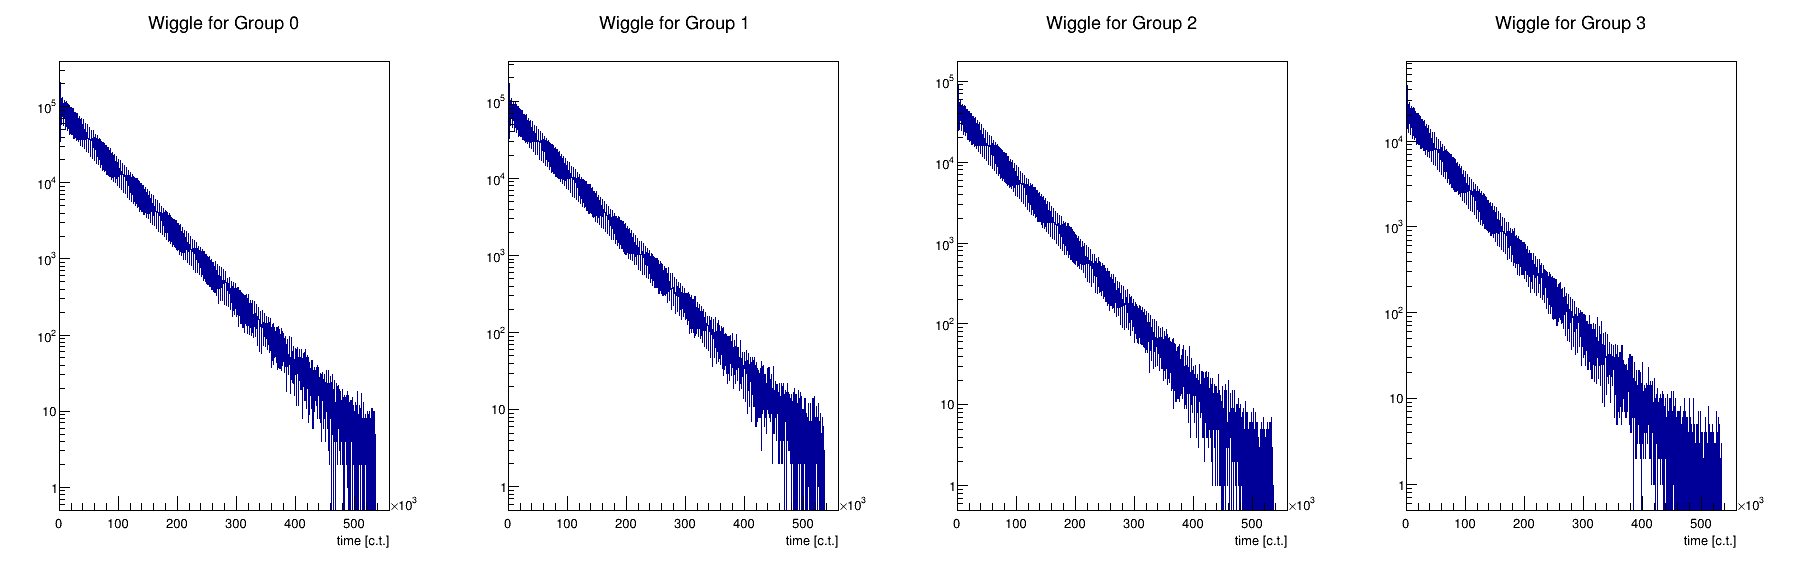

In [54]:
c = r.TCanvas("c","c",1800,600)
c.Divide(len(tempHists),1)
for i, h in enumerate(tempHists):
    c.cd(i+1)
    h.Draw()
    r.gPad.SetLogy()
c.Draw()

In [55]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'This is my fight song. Blinding my plot song.')
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [56]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(700000,64.4,0.4,0,0)
func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetLineColor(2)
func.SetNpx(2000)

0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
0.0 560000.0
0.0 700.0
Sarting fit: 1
Sarting fit: 2
 FCN=14063.2 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         583 TOTAL
                     EDM=1.44337e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.04135e+05   3.50359e+01   9.32023e-03  -4.40328e-10
   2  #tau         6.42471e+01   1.21819e-02  -7.70268e-06   1.41449e-05
   3  A            3.90565e-01   2.50233e-04  -2.00185e-07   1.10107e-04
   4  R           -4.51518e+01   7.21530e+00   3.25279e-04  -3.09594e-07
   5  #phi        -1.05475e+00   1.18203e-03   1.18203e-03   1.36581e-02
 FCN=14063.2 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         282 TOTAL
                     EDM=5.25711e-07    STRAT

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


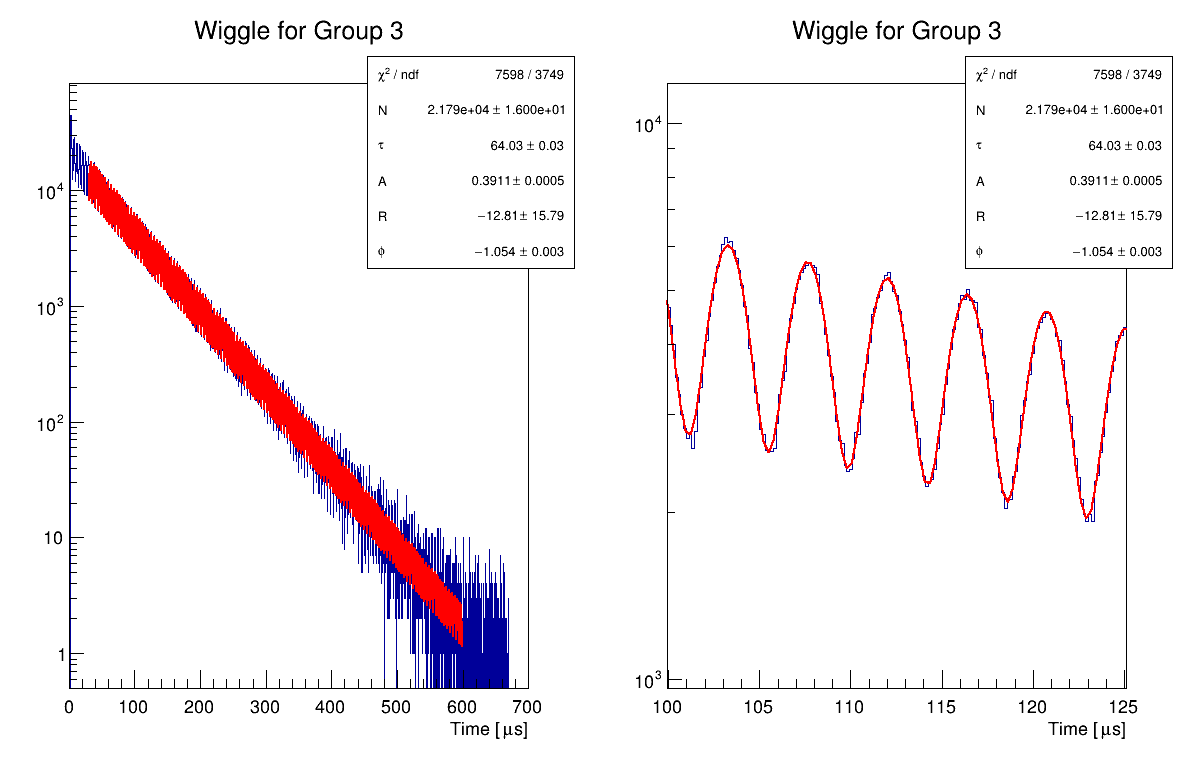

In [57]:
fivePars = []

for h in tempHists:
    c2 = r.TCanvas("c2","c2",1200,800)
    c2.Divide(2,1)
    c2.cd(1)
    r.gPad.SetLogy()

    r.gStyle.SetOptFit(111)
    allCaloWiggle = h.Clone()

    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

    residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

    for fit in range(2):
        print("Sarting fit:", fit+1)
        allCaloWiggle.Fit("func","REM")


    fivePars.append([func.GetParameter(i) for i in range(5)]+[func.GetNDF(),
                  func.GetChisquare()])
    #chiSqAll = ( ( func.GetNDF(),
    #              func.GetChisquare(),
    #              func.GetProb() ) )

    allCaloWiggle.Draw()

    c2.cd(2)
    ding =  allCaloWiggle.Clone()
    ding.GetXaxis().SetRangeUser(100,125)
    ding.Draw()

    r.gPad.SetLogy()
    c2.Draw()

In [58]:
print(fivePars)

[[104135.20445795903, 64.24709139874952, 0.39056468132826827, -45.15154622489467, -1.0547513048406474, 3820, 14063.224214686206], [84069.04229544141, 64.21250496056543, 0.39093720737401555, -33.592037728394494, -1.0536911188893008, 3820, 12304.162723079353], [44786.49457798824, 64.18040932623308, 0.390828024501049, -31.772285319894447, -1.054384417395986, 3811, 9043.156321807925], [21789.74359379611, 64.03067017309485, 0.3910771321729384, -12.812066748448165, -1.0537048586243998, 3749, 7597.897815013721]]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


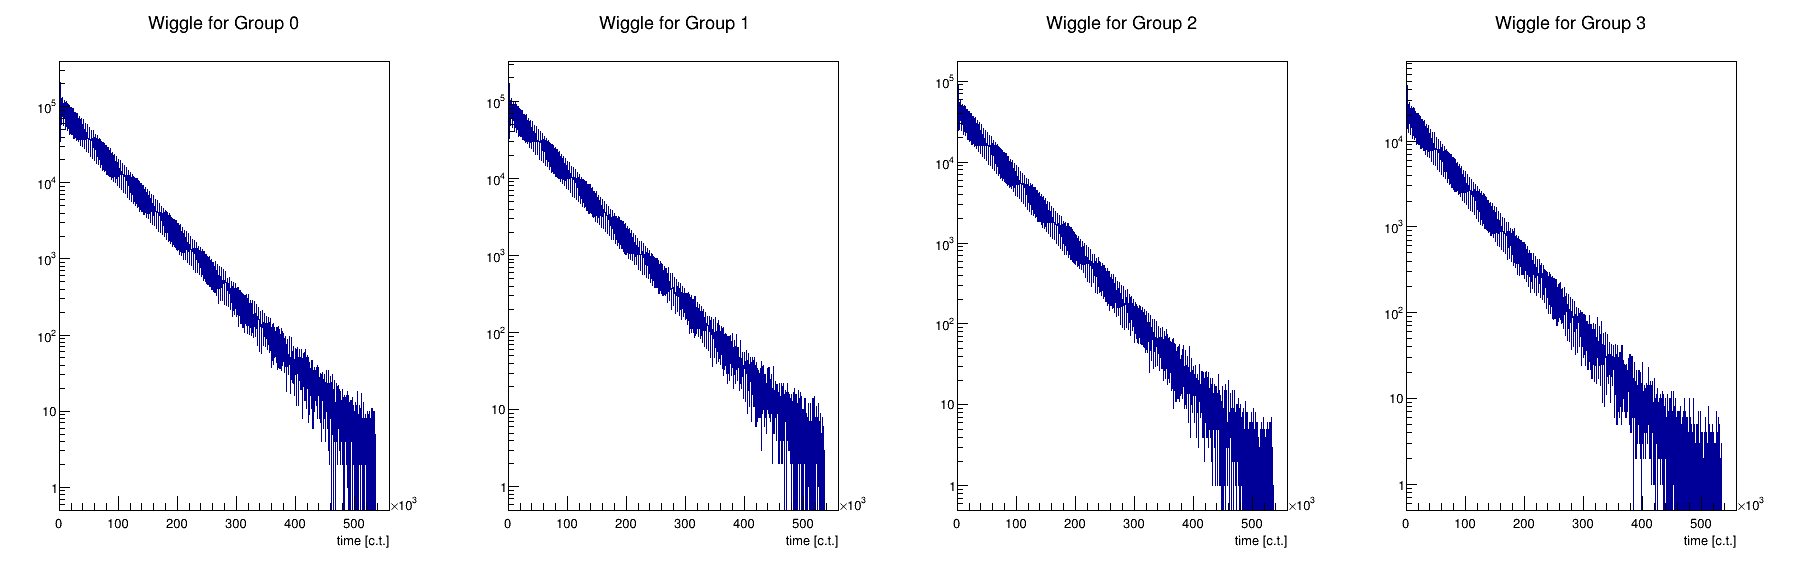

In [59]:
c = r.TCanvas("c","c",1800,600)
c.Divide(len(tempHists),1)
for i, h in enumerate(tempHists):
    c.cd(i+1)
    h.Draw()
    r.gPad.SetLogy()
c.Draw()

In [60]:
dfFivePars = pandas.DataFrame(fivePars, columns=['N','tau','A','R','phi','ndf','chisq'])

In [61]:
dfFivePars['chisq/ndf'] = dfFivePars['chisq'] / dfFivePars['ndf']
dfFivePars.head()

,N,tau,A,R,phi,ndf,chisq,chisq/ndf
0,104135.204458,64.247091,0.390565,-45.151546,-1.054751,3820,14063.224215,3.681472
1,84069.042295,64.212505,0.390937,-33.592038,-1.053691,3820,12304.162723,3.220985
2,44786.494578,64.180409,0.390828,-31.772285,-1.054384,3811,9043.156322,2.372909
3,21789.743594,64.030670,0.391077,-12.812067,-1.053705,3749,7597.897815,2.026647


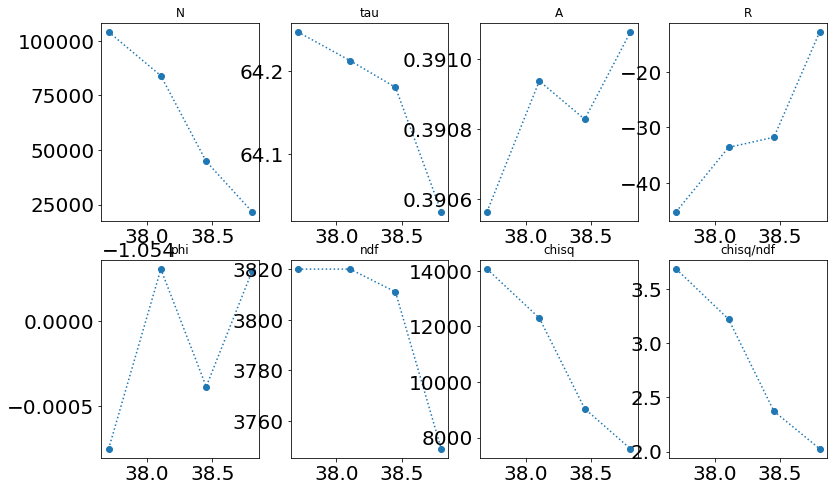

In [62]:
fig,ax = plt.subplots(2,4, figsize=(13,8))
for i, column in enumerate(dfFivePars):
    ax[int(np.floor(i/4))][i%4].plot(meanTemps, dfFivePars[column],':o')
    ax[int(np.floor(i/4))][i%4].set_title(column)
plt.show()

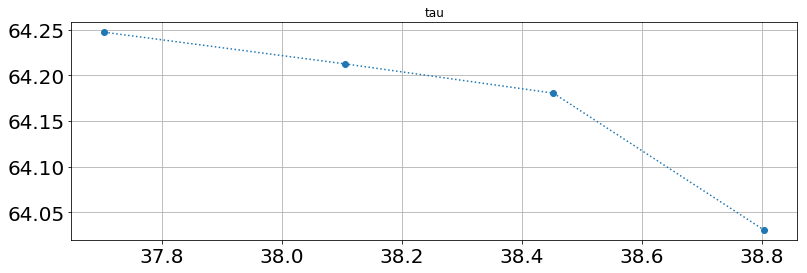

In [63]:
fig,ax = plt.subplots(figsize=(13,4))
column='tau'
plt.plot(meanTemps, dfFivePars[column],':o')
plt.title(column)
plt.grid()
plt.show()

---

### now lets bring in a 13 parameter fit function

In [64]:
def blinded_wiggle_cbo(x, p):
    norm     = p[0]
    life     = p[1]
    asym     = p[2]
    R        = p[3]
    phi      = p[4]
    A1       = p[5]
    A2       = p[6]
    A3       = p[7]
    lifeCBO  = p[8]
    omegaCBO = p[9]
    phiCBO1  = p[10]
    phiCBO2  = p[11]
    phiCBO3  = p[12]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
    
    cCBO = 1-math.exp(-time/lifeCBO)*A1*math.cos(omegaCBO*time + phiCBO1)
    ACBO = asym * (1 - math.exp(-time/lifeCBO) * A2 * math.cos(omegaCBO*time + phiCBO1))
    phiCBO = phi + math.exp(-time/lifeCBO)*A3*math.cos(omegaCBO*time + phiCBO1)
    
    return norm * math.exp(-time/life) * cCBO * (1 - ACBO*math.cos(omega*time + phiCBO))

In [65]:
func13 = r.TF1("func13", blinded_wiggle_cbo, 30,500,13)
func13.SetParNames('N','#tau','A',
                   'R','#phi','A_{1}',
                   'A_{2}','A_{3}','#tau_{CBO}',
                   '#omega_{CBO}','#phi_{CBO - 1}')
#func13.SetParName(11,'#phi_{CBO - 2}')
#func13.SetParName(12,'#phi_{CBO - 3}')
func13.SetParLimits(4,-6.3,6.3) #Phases should be restricted to +/- 2Pi
func13.SetParLimits(8,0.0000001,100000000) #Avoid divide by 0 error
func13.SetParLimits(10,-6.3,6.3) 
#func13.SetParLimits(11,-6.3,6.3)
#func13.SetParLimits(12,-6.3,6.3)

#initial guesses, then updated with the first round of fit results
#func13.SetParameters(1500,64.4,0.4,0,0,1,1,1,.01,.01,0)
#func13.SetParameter(11,0)
#func13.SetParameter(12,0)
func13.SetParameters(100000, 64.32689658986958, -0.41149191856871803, 
                     -11.31981267111425, -4.201648334505292, -0.666502391530784, 
                     0.6927259503578, -0.38908021438317, 220, 
                     4.1, 0.4745581246420292)
#func13.SetParameter(11, 6.299934663288357)
#func13.SetParameter(12, 0.28579778778899545)
#func13.FixParameter(12,0) #currently this parameter is fixed, as it doesn't behave well if left to wander on its own


func13.SetLineColor(2)
func13.SetNpx(2000)

In [66]:
func13u = r.TF1("func13u", blinded_wiggle_cbo, 30,500,13) #version of func13 with par limits removed
func13u.SetParNames('N','#tau','A',
                   'R','#phi','A_{1}',
                   'A_{2}','A_{3}','#tau_{CBO}',
                   '#omega_{CBO}','#phi_{CBO - 1}')
func13u.SetParName(11,'#phi_{CBO - 2}')
func13u.SetParName(12,'#phi_{CBO - 3}')
#func13.SetParLimits(4,-6.3,6.3) #Phases should be restricted to +/- 2Pi
func13u.SetParLimits(8,0.0000001,100000000) #Avoid divide by 0 error

#for i in range(13):
#    func13u.SetParameter(i, func13.GetParameter(i))

func13u.SetLineColor(2)
func13u.SetNpx(5000)

0.0 560000.0
0.0 700.0
Sarting fit: 1
0.0 560000.0
0.0 700.0
Sarting fit: 1
0.0 560000.0
0.0 700.0
Sarting fit: 1
0.0 560000.0
0.0 700.0
Sarting fit: 1
 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FUNCTION MUST BE MINIMIZED BEFORE CALLING MINOs     
 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
   

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <Fit>: Abnormal termination of minimization.
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <Fit>: Abnormal termination of minimization.


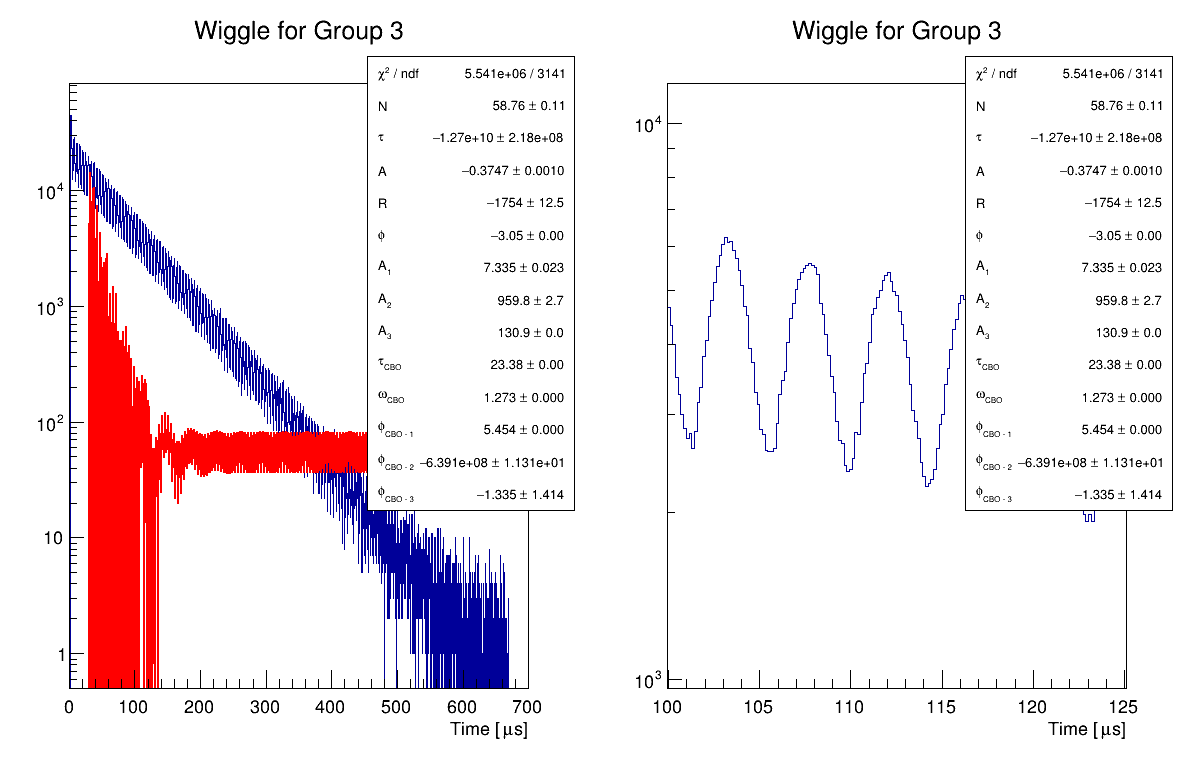

In [73]:
thirteenPars = []
thirteenParsu = []
tempHistsFit13 = []

for j, h in enumerate(tempHists):
    
    #if(j>0):
    #    break
    
    c2 = r.TCanvas("c2","c2",1200,800)
    c2.Divide(2,1)
    c2.cd(1)
    r.gPad.SetLogy()

    r.gStyle.SetOptFit(111)
    allCaloWiggle = h.Clone()

    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetLimits(allCaloWiggle.GetXaxis().GetXmin() / 1000 * 1.25,allCaloWiggle.GetXaxis().GetXmax() / 1000 * 1.25)
    print(allCaloWiggle.GetXaxis().GetXmin(),allCaloWiggle.GetXaxis().GetXmax())
    allCaloWiggle.GetXaxis().SetTitle("Time [#mus]")

    residuals = allCaloWiggle.Clone() # this will be filled with the fit residuals later

    for fit in range(1):
        print("Sarting fit:", fit+1)
        allCaloWiggle.Fit("func13","REMB")
        for i in range(13):
            func13u.SetParameter(i, func13.GetParameter(i))
        allCaloWiggle.Fit("func13u","REMB")


    thirteenPars.append([func13.GetParameter(i) for i in range(13)]+[func13.GetNDF(),
                  func13.GetChisquare(),
                  func13.GetProb()])
    thirteenParsu.append([func13u.GetParameter(i) for i in range(13)]+[func13u.GetNDF(),
                  func13u.GetChisquare(),
                  func13u.GetProb()])

    allCaloWiggle.Draw()

    c2.cd(2)
    ding =  allCaloWiggle.Clone()
    ding.GetXaxis().SetRangeUser(100,125)
    ding.Draw()

    r.gPad.SetLogy()
    c2.Draw()
    
    tempHistsFit13.append(allCaloWiggle.Clone())

In [74]:
print(thirteenPars)

[[312.62314501542477, -8744614994.75291, -0.3778254526702174, -1809.5185460480936, -3.047287914685159, 7.30337667616913, 859.4037465483069, 130.92382844287675, 23.377324209841145, 1.2729306615026, 5.453510758663627, -346219648.95828056, -1.3354539572823945, 3143, 26497239.295867264, 0.0], [248.58201124540363, -8744803756.20326, -0.38449373993320396, -1739.1079693951144, -3.0514605340921213, 7.301248822419496, 855.9950620166647, 130.9261321454197, 23.376469771099163, 1.2729318206725315, 5.453489777141185, -477021856.2345276, -1.3354539572823945, 3143, 21386520.785422858, 0.0], [128.60783327315812, -11104148060.866425, -0.39300832976783323, -1802.5630378938383, -3.048564688130089, 7.29847935157307, 860.6058025684622, 130.8582388694593, 23.3851200626933, 1.272928113338733, 5.45365824858673, -572518632.2280321, -1.3354539572823945, 3143, 11399541.78144198, 0.0], [58.75795015911086, -12684597154.080923, -0.374747443627952, -1754.4190225003792, -3.0503177087029796, 7.3343047820112135, 959.87

In [75]:
df13Pars = pandas.DataFrame(thirteenPars, columns=['N','tau','A','R','phi','A_{1}',
                                                    'A_{2}','A_{3}','#tau_{CBO}',
                                                    '#omega_{CBO}','#phi_{CBO - 1}','#phi_{CBO - 2}',
                                                    '#phi_{CBO - 3}','ndf','chisq','prob'])

In [76]:
df13Pars.head()

,N,tau,A,R,phi,A_{1},A_{2},A_{3},#tau_{CBO},#omega_{CBO},#phi_{CBO - 1},#phi_{CBO - 2},#phi_{CBO - 3},ndf,chisq,prob
0,312.623145,-8.744615e+09,-0.377825,-1809.518546,-3.047288,7.303377,859.403747,130.923828,23.377324,1.272931,5.453511,-3.462196e+08,-1.335454,3143,2.649724e+07,0.0
1,248.582011,-8.744804e+09,-0.384494,-1739.107969,-3.051461,7.301249,855.995062,130.926132,23.376470,1.272932,5.453490,-4.770219e+08,-1.335454,3143,2.138652e+07,0.0
2,128.607833,-1.110415e+10,-0.393008,-1802.563038,-3.048565,7.298479,860.605803,130.858239,23.385120,1.272928,5.453658,-5.725186e+08,-1.335454,3143,1.139954e+07,0.0
3,58.757950,-1.268460e+10,-0.374747,-1754.419023,-3.050318,7.334305,959.878322,130.920345,23.375959,1.272921,5.453680,-6.390972e+08,-1.335454,3141,5.540877e+06,0.0


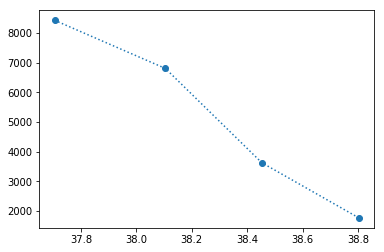

In [77]:
plt.plot(meanTemps, df13Pars['chisq']/df13Pars['ndf'],":o")
plt.show()

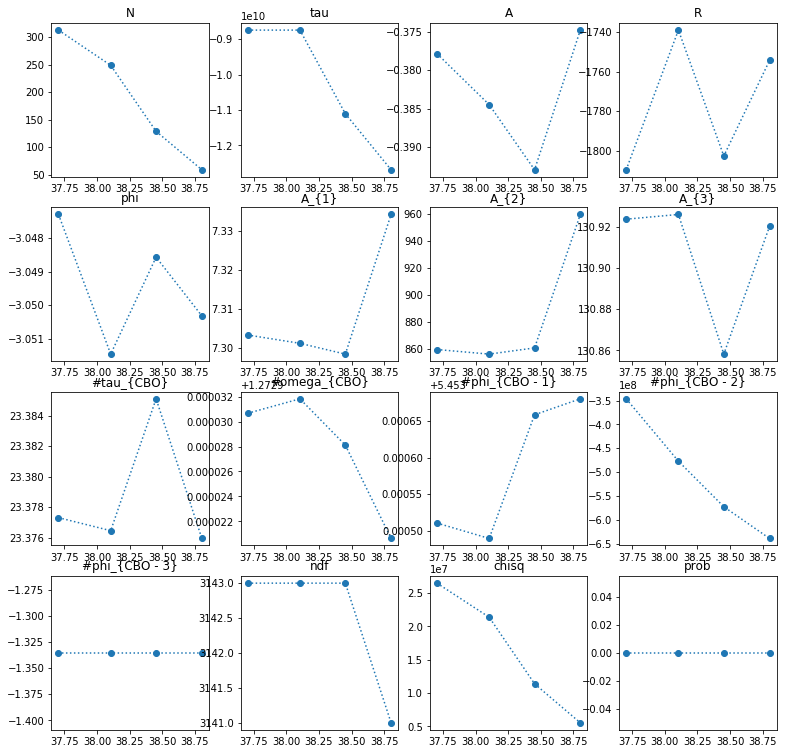

In [78]:
setint()
fig,ax = plt.subplots(4,4, figsize=(13,13))
for i, column in enumerate(df13Pars):
    ax[int(np.floor(i/4))][i%4].plot(meanTemps, df13Pars[column],':o')
    ax[int(np.floor(i/4))][i%4].set_title(column)
plt.show()